In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")


In [21]:
# Query 1: Total Sales 
query1 = "SELECT SUM(amount) AS total_sales FROM sales"
df1 = pd.read_sql_query(query1, conn)
print("\n Total Sales ")
print(df1)


 Total Sales 
   total_sales
0      6182639


In [20]:
# Query 2: Total Profit 
query2 = "SELECT SUM(profit) AS total_profit FROM sales"
df2 = pd.read_sql_query(query2, conn)
print("\n Total Profit ")
print(df2)


 Total Profit 
   total_profit
0       1610697


In [22]:
# Query 3: Total Quantity Sold
query3 = "SELECT SUM(quantity) AS total_quantity FROM sales"
df3 = pd.read_sql_query(query3, conn)
print("\n Total Quantity Sold")
print(df3)


 Total Quantity Sold
   total_quantity
0           12745


In [30]:
# Query 4: Total Orders 
query4 = 'SELECT COUNT("Order ID") AS total_orders FROM sales'
df4 = pd.read_sql_query(query4, conn)
print("\n Total Orders ")
print(df4)


 Total Orders 
   total_orders
0          1194


In [31]:
# Query 5: Total Sales by Product
query5 = """
SELECT Product_Name, SUM(Amount) AS total_sales 
FROM sales 
GROUP BY Product_Name 
ORDER BY total_sales DESC
"""
df5 = pd.read_sql_query(query5, conn)
print("\nQuery 5: Total Sales by Product")
print(df5)


Query 5: Total Sales by Product
        Product_Name  total_sales
0            Markers       627875
1             Tables       625177
2              Sofas       568367
3           Printers       566359
4   Electronic Games       565092
5               Pens       552269
6              Paper       524755
7             Phones       503055
8             Chairs       431964
9            Laptops       419950
10         Bookcases       413165
11           Binders       384611


In [32]:
# Query 6: Total Profit by Payment Mode
query6 = """
SELECT PaymentMode, SUM(Profit) AS total_profit 
FROM sales 
GROUP BY PaymentMode 
ORDER BY total_profit DESC
"""
df6 = pd.read_sql_query(query6, conn)
print("\nQuery 6: Total Profit by Payment Mode")
print(df6)


Query 6: Total Profit by Payment Mode
   PaymentMode  total_profit
0   Debit Card        375721
1  Credit Card        349392
2          UPI        333889
3          EMI        295951
4          COD        255744


In [33]:
# Query 7: Total Orders by State
query7 = """
SELECT State, COUNT("Order ID") AS total_orders 
FROM sales 
GROUP BY State 
ORDER BY total_orders DESC
"""
df7 = pd.read_sql_query(query7, conn)
print("\nQuery 7: Total Orders by State")
print(df7)


Query 7: Total Orders by State
        State  total_orders
0    New York           226
1  California           218
2     Florida           200
3       Texas           189
4    Illinois           181
5        Ohio           180


In [34]:
# Query 8: Total Quantity Sold by Year-Month
query8 = """
SELECT "Year-Month", SUM(Quantity) AS total_quantity 
FROM sales 
GROUP BY "Year-Month" 
ORDER BY "Year-Month"
"""
df8 = pd.read_sql_query(query8, conn)
print("\nQuery 8: Total Quantity Sold by Year-Month")
print(df8)

# Closing the database connection
conn.close()


Query 8: Total Quantity Sold by Year-Month
   Year-Month  total_quantity
0     2020-03              44
1     2020-04             228
2     2020-05             229
3     2020-06             120
4     2020-07              58
..        ...             ...
56    2024-11             177
57    2024-12             182
58    2025-01             177
59    2025-02             157
60    2025-03             104

[61 rows x 2 columns]


Saved: sales_by_product.png


<Figure size 1000x600 with 0 Axes>

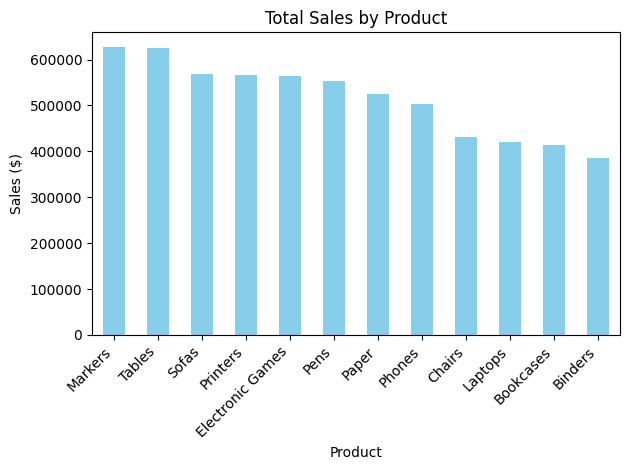

In [39]:
# Visualization 1: Bar Chart - Total Sales by Product
plt.figure(figsize=(10, 6))
df5.plot(kind='bar', x='Product_Name', y='total_sales', color='skyblue', legend=False)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_by_product.png")
print("Saved: sales_by_product.png")
plt.show()  # Displaying the chart
plt.close()

Saved: profit_by_payment_mode.png


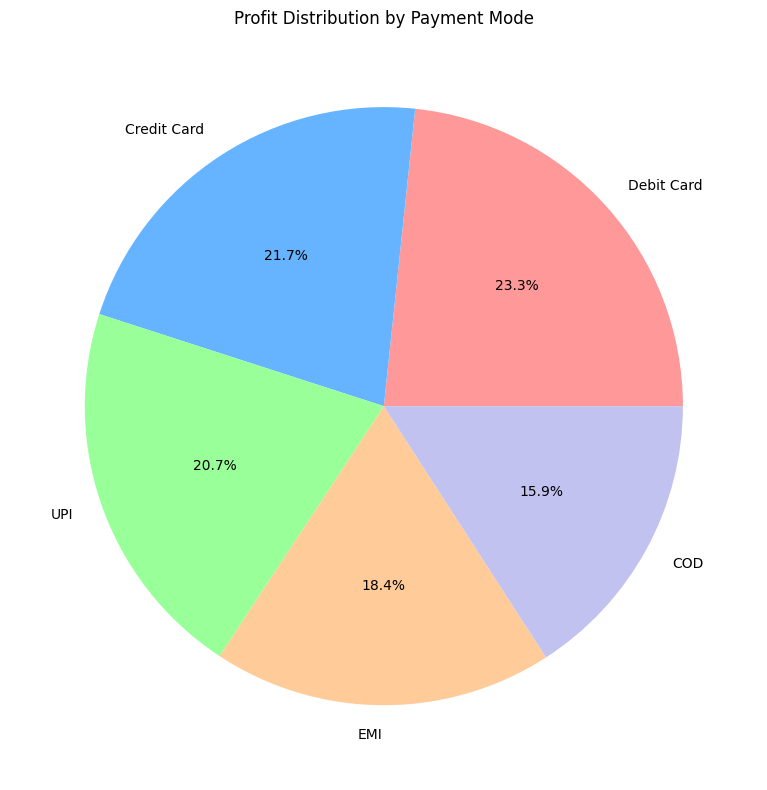

In [40]:
# Visualization 2: Pie Chart - Total Profit by Payment Mode
plt.figure(figsize=(8, 8))
plt.pie(df6['total_profit'], labels=df6['PaymentMode'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Profit Distribution by Payment Mode')
plt.tight_layout()
plt.savefig("profit_by_payment_mode.png")
print("Saved: profit_by_payment_mode.png")
plt.show()  # Displaying the chart
plt.close()

Saved: orders_by_state.png


<Figure size 1000x600 with 0 Axes>

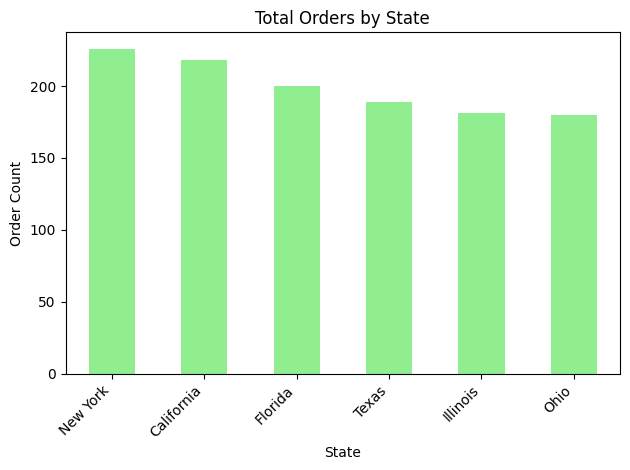

In [41]:
# Visualization 3: Bar Chart - Total Orders by State
plt.figure(figsize=(10, 6))
df7.plot(kind='bar', x='State', y='total_orders', color='lightgreen', legend=False)
plt.title('Total Orders by State')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("orders_by_state.png")
print("Saved: orders_by_state.png")
plt.show()  # Displaying the chart
plt.close()

Saved: quantity_by_year_month.png


<Figure size 1200x600 with 0 Axes>

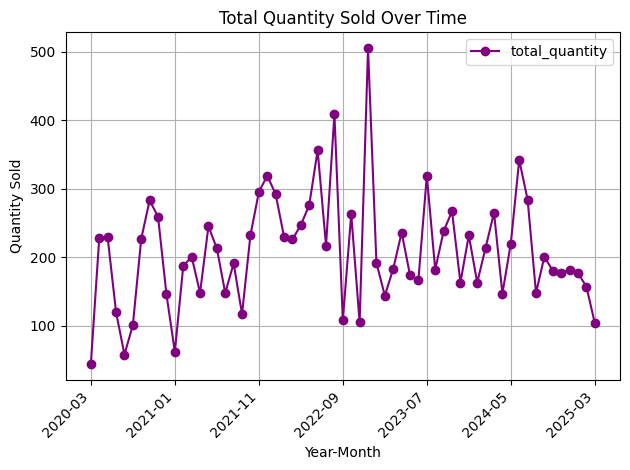

In [42]:
# Visualization 4: Line Plot - Total Quantity Sold by Year-Month
plt.figure(figsize=(12, 6))
df8.plot(kind='line', x='Year-Month', y='total_quantity', marker='o', color='purple')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig("quantity_by_year_month.png")
print("Saved: quantity_by_year_month.png")
plt.show()  # Displaying the chart
plt.close()